In [1]:
#manipulation data libraries
import pandas as pd
import numpy as np

#visualiation data libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import sklearn as sk
import tensorflow as tf
import keras as ks

In [2]:
#set default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [3]:
#import the dataset
dataLabelled =  pd.read_csv('breast-cancer-wisconsin.data', sep=",", header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','diagnosis'])
print(dataLabelled.dtypes)

id                              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
diagnosis                       int64
dtype: object


In [4]:
#drop the 16 instances where bare_nuclei has a "?" as a value
#the total value of instances is now 683
dataLabelled.drop(dataLabelled[(dataLabelled['bare_nuclei'] == '?')].index, inplace=True)

In [5]:
#check the data types and entries
dataLabelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           683 non-null    int64 
 1   clump_thickness              683 non-null    int64 
 2   uniformity_of_cell_size      683 non-null    int64 
 3   uniformity_of_cell_shape     683 non-null    int64 
 4   marginal_adhesion            683 non-null    int64 
 5   single_epithelial_cell_size  683 non-null    int64 
 6   bare_nuclei                  683 non-null    object
 7   bland_chromatin              683 non-null    int64 
 8   normal_nucleoli              683 non-null    int64 
 9   mitoses                      683 non-null    int64 
 10  diagnosis                    683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [6]:
#convert the bare_nuclei column from object type to a float64
dataLabelled['bare_nuclei'] = pd.to_numeric(dataLabelled['bare_nuclei'],errors='coerce')

In [7]:
#replace the 2 (benign ) and 4 (malignant) with 0 and 1
dataLabelled['diagnosis'].replace({2:0,4:1},inplace=True)

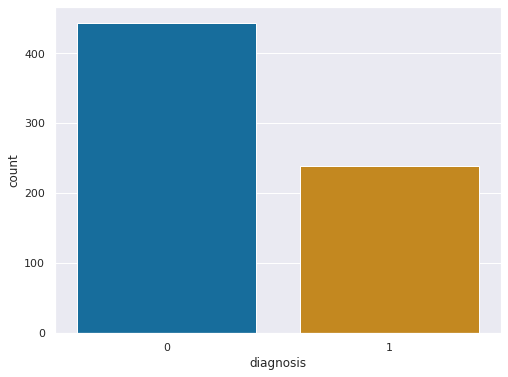

In [8]:
#plot the benign and malicious diagnosis 
plt.figure(figsize = (8,6))
sns.countplot(x = 'diagnosis', data = dataLabelled)

In [12]:
#more plotting but didn't work
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
fig = px.pie(dataLabelled, values=dataLabelled['diagnosis'].value_counts().values, names=dataLabelled['diagnosis'].value_counts().index)
fig.show()

In [13]:
# drop the id columns
dataLabelled.drop('id',axis=1, inplace=True)

In [14]:
#display the dataframe that will be used
dataLabelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clump_thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
uniformity_of_cell_size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
uniformity_of_cell_shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
single_epithelial_cell_size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
bland_chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
diagnosis,683.0,0.349927,0.477296,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Correlation Map')

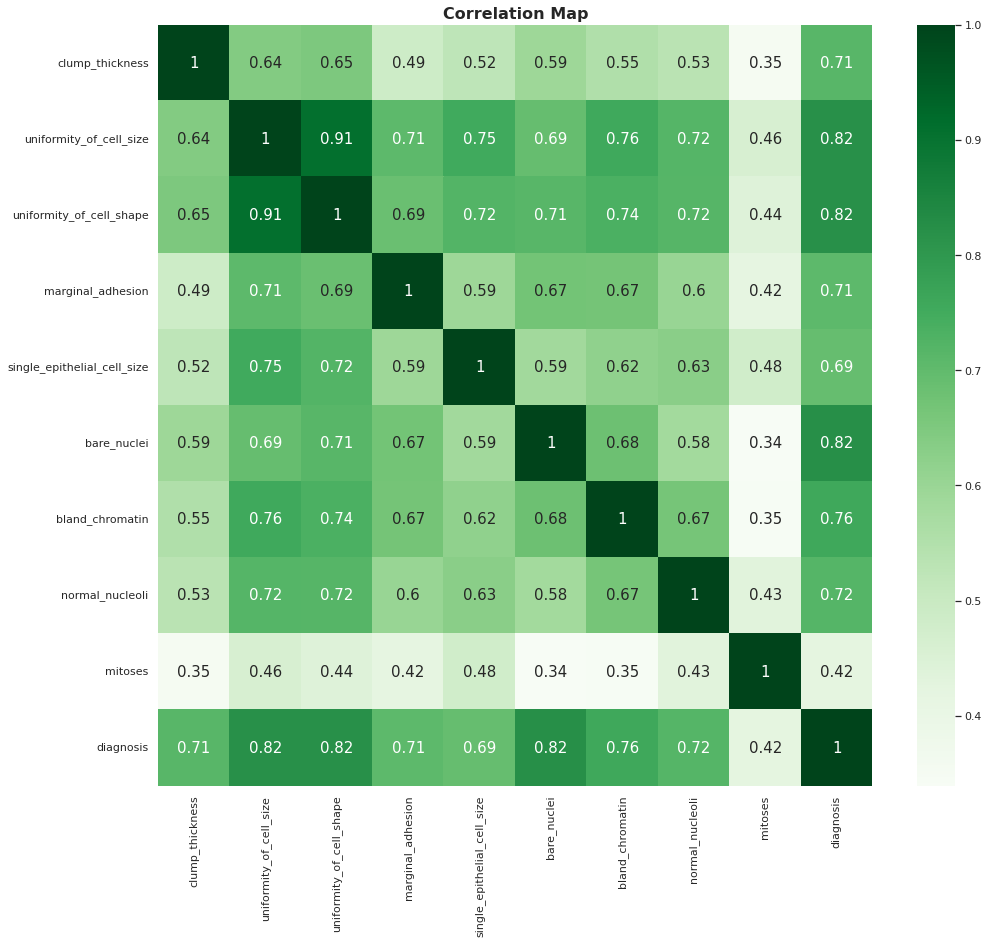

In [15]:
#create a confusion matrix to identify highly correlated features
plt.figure(figsize=(16,14))
sns.heatmap(dataLabelled.corr(), cmap='Greens', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [16]:
#define dependent (x) and independent (y) variables
x = dataLabelled.drop('diagnosis', axis=1)
y = dataLabelled['diagnosis']

In [17]:
#remove the two highly correlated features identified
dataLabelled.drop(columns='uniformity_of_cell_size',inplace=True)
dataLabelled.drop(columns='uniformity_of_cell_shape',inplace=True)

In [18]:
#create the object
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [19]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [20]:
#import keras library
import keras
#impor sequential module
from keras.models import Sequential
#import dense module for hidden layers
from keras.layers import Dense
#import activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [21]:
from keras.layers import BatchNormalization
#create ann with sequence of layers
ann =Sequential()

#add 1st hidden layer with 30 neurons --- input layer is addedd automatically
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#add 2nd hidden layer with 25 neurons
ann.add(Dense(units = 25,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#add 3rd hidden layer with 25 neurons
ann.add(Dense(units = 25,activation = 'relu'))

#add output layer with 1 neuron for binary classification
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [22]:
#set callbacks to monitor maximum accuracy
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor = 'accuracy', mode = 'max',patience = 25)

In [23]:
#compile the ann using the stochastic gradient descent (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
#train the ann with batch size of 32
ann.fit(x_train, y_train,batch_size = 32, validation_data=(x_test, y_test),epochs = 200,callbacks = [early])

Epoch 1/200
16/16 [==============================] - 2s 26ms/step - loss: 0.8136 - accuracy: 0.4707 - val_loss: 0.6302 - val_accuracy: 0.3392
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5995 - accuracy: 0.6465 - val_loss: 0.5705 - val_accuracy: 0.5322
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5220 - accuracy: 0.7832 - val_loss: 0.5043 - val_accuracy: 0.7485
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4310 - accuracy: 0.8398 - val_loss: 0.4579 - val_accuracy: 0.8363
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3553 - accuracy: 0.8984 - val_loss: 0.4064 - val_accuracy: 0.8947
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.9336 - val_loss: 0.3515 - val_accuracy: 0.9240
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.9375 - val_loss: 0.2956 - val_accuracy: 0.9357
Epoch 8/200


In [25]:
#summary of layers
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 batch_normalization_1 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 25)                0

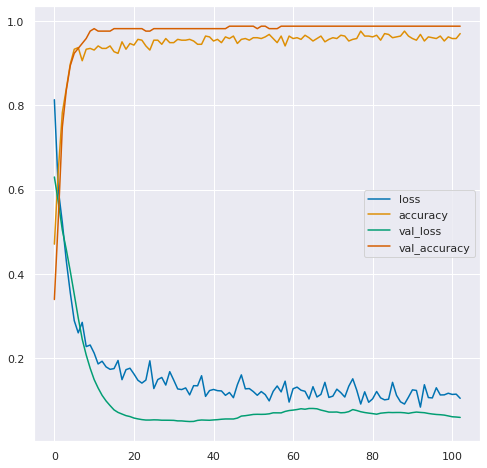

In [26]:
#plot the loss vs accuracy gain
losses = pd.DataFrame(ann.history.history)
losses.plot()

In [27]:
#test the testing data
y_pred = ann.predict(x_test)
#convert values
y_pred = (y_pred>0.5)

6/6 [==============================] - 0s 3ms/step


In [37]:
#create a confusion matrix
#calculate the accuracy score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('score is:',score)

[[111   2]
 [  0  58]]
score is: 0.9883040935672515


In [38]:
#calculate precision, recall and f1 score metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.97      1.00      0.98        58

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



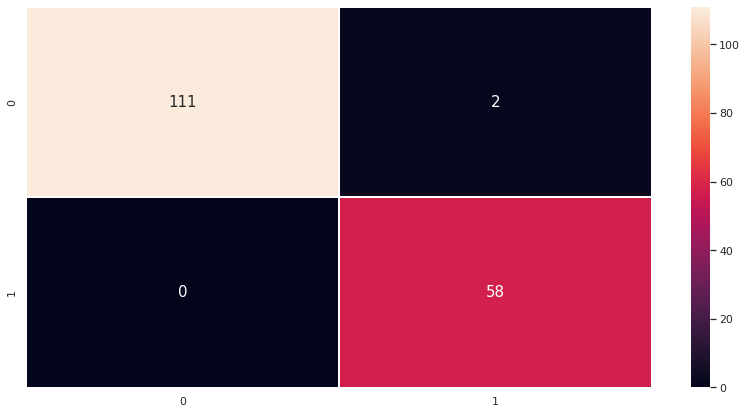

In [43]:
#create confussion matrix through heatmap
plt.figure(figsize=[14,7])
sns.heatmap(cm, annot=True, fmt="d", linewidth=.5)
plt.show()

In [44]:
from keras.layers import BatchNormalization
#create ann with sequence of layers
ann =Sequential()

#add 1st hidden layer with 30 neurons --- input layer is addedd automatically
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#add 2nd hidden layer with 25 neurons
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#add output layer with 1 neuron for binary classification
ann.add(Dense(units = 1,activation = 'sigmoid'))

#compile the ann using the stochastic gradient descent (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#set callbacks to monitor maximum accuracy
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#train the ann with batch size of 32
model=ann.fit(x_train, y_train,batch_size = 32, validation_data=(x_test, y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 1.6932 - accuracy: 0.5488 - val_loss: 0.6421 - val_accuracy: 0.5263
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.2103 - accuracy: 0.4336 - val_loss: 0.6490 - val_accuracy: 0.3977
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8706 - accuracy: 0.4863 - val_loss: 0.6140 - val_accuracy: 0.4211
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8754 - accuracy: 0.4941 - val_loss: 0.5832 - val_accuracy: 0.4854
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7601 - accuracy: 0.5156 - val_loss: 0.5565 - val_accuracy: 0.7544
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7536 - accuracy: 0.5547 - val_loss: 0.5399 - val_accuracy: 0.8363
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.6035 - val_loss: 0.5293 - val_accuracy: 0.8421
Epoch 8/100


In [45]:
#install necessary keras visualization libraries 
!pip install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=8aa70378dfe9ad145d5c9f68098e3e2391b20de667bd52cd0739b6620416791c
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


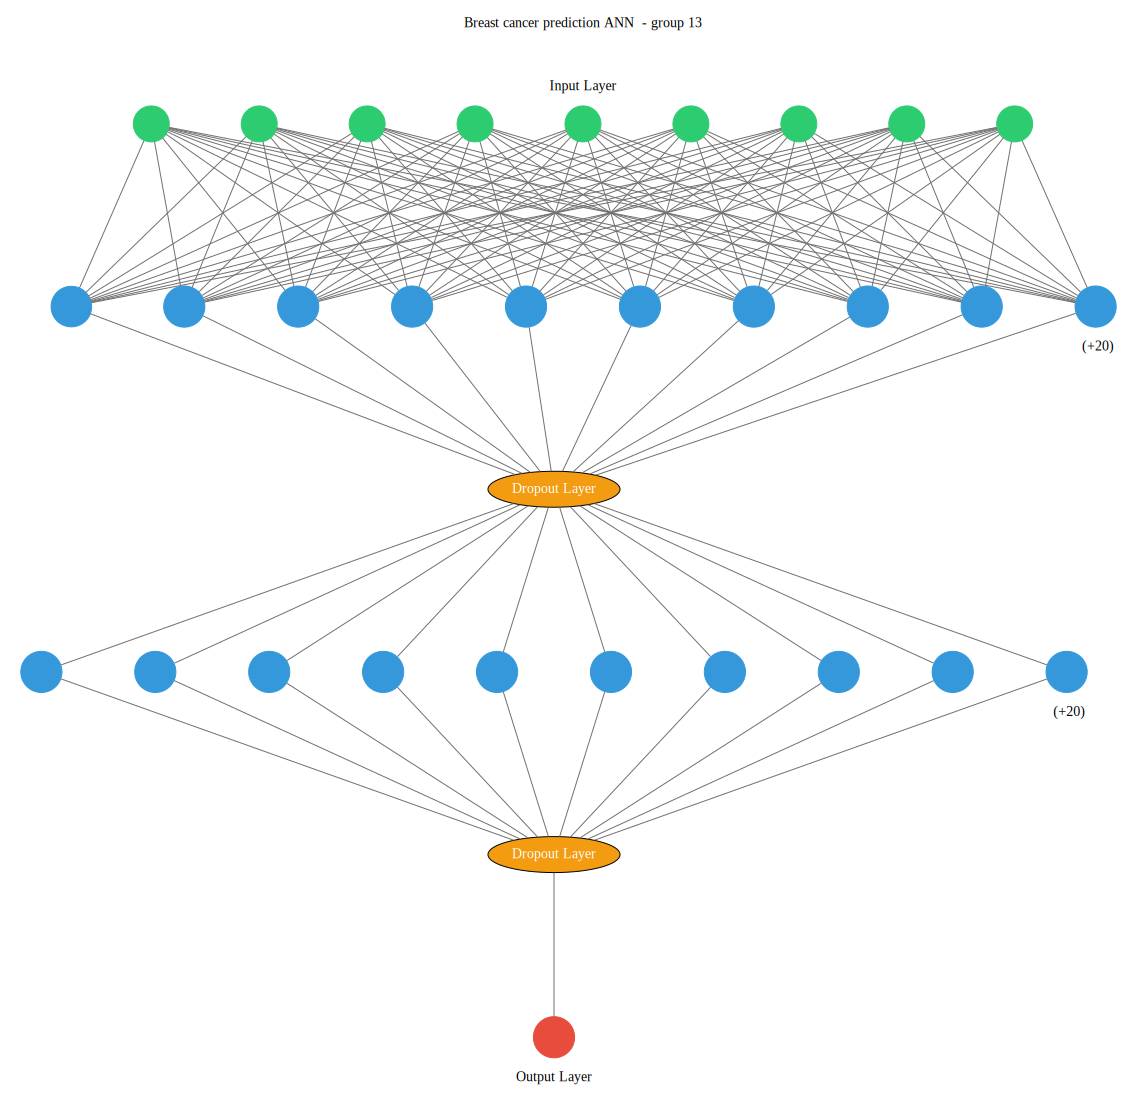

In [47]:
#visualise the network
from ann_visualizer.visualize import ann_viz;
from graphviz import Source
ann_viz(ann, view=True, filename='network.gv', title='Breast cancer prediction ANN  - group 13')
Source.from_file('./network.gv')

In [48]:
from keras.layers import BatchNormalization
#create ann with sequence of layers
ann =Sequential()

#add 1st hidden layer with 30 neurons --- input layer is addedd automatically
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#add 2nd hidden layer with 25 neurons
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

#add output layer with 1 neuron for binary classification
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [49]:
#compile the ann using the stochastic gradient descent (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#set callbacks to monitor maximum accuracy
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#train the ann with batch size of 32
model=ann.fit(x_train, y_train,batch_size = 32, validation_data=(x_test, y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 1.0049 - accuracy: 0.5801 - val_loss: 0.6677 - val_accuracy: 0.3450
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8850 - accuracy: 0.5430 - val_loss: 0.6385 - val_accuracy: 0.3626
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7964 - accuracy: 0.5430 - val_loss: 0.6115 - val_accuracy: 0.4795
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7100 - accuracy: 0.5957 - val_loss: 0.5893 - val_accuracy: 0.6199
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6328 - val_loss: 0.5675 - val_accuracy: 0.6842
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6406 - val_loss: 0.5454 - val_accuracy: 0.7427
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.6836 - val_loss: 0.5284 - val_accuracy: 0.8129
Epoch 8/100


In [50]:
#visualise the ann
from ann_visualizer.visualize import ann_viz;
from graphviz import Source
ann_viz(ann, view=True, filename='network.gv', title='Breast cancer prediction ANN  - group 13')